# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('valorant_games.csv')

# My Question

### How did this new player, transform from Silver 3, to Ascendent 1 in 1000 games?

###### Well first, we have to look at the overall data.
###### Then, I found a win loss percentage based of the bargraph, and created a win/loss % for each row.
###### Then I wanted to find what agent he's played the most, along with the KDR(Kill/Death Ratio).
###### Finally, I wanted a line graph to simulate his rank progression throughout his journey.

# My Analysis

In [3]:
df.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,4/11/2023,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,4/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4


In [4]:
df.describe()

,game_id,episode,act,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,7.500000,2.066000,10.589000,10.52700,15.299000,14.249000,4.656000,1.178400,10.308000,22.763000,134.446000,205.382000,2.990000
std,288.819436,1.102368,0.868561,3.359966,3.55273,5.253113,3.724362,2.656072,0.656784,43.383791,9.919033,35.199916,56.539958,1.368127
min,1.000000,6.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.200000,-124.000000,2.000000,42.000000,59.000000,1.000000
25%,250.750000,7.000000,1.000000,8.000000,8.00000,12.000000,13.000000,3.000000,0.800000,-20.000000,15.000000,110.000000,166.000000,2.000000
50%,500.500000,7.000000,2.000000,13.000000,13.00000,15.000000,15.000000,4.000000,1.100000,9.000000,22.000000,133.000000,203.000000,3.000000
75%,750.250000,9.000000,3.000000,13.000000,13.00000,19.000000,17.000000,6.000000,1.400000,39.000000,29.000000,157.000000,240.000000,4.000000
max,1000.000000,9.000000,3.000000,18.000000,20.00000,35.000000,26.000000,20.000000,9.700000,293.000000,63.000000,373.000000,572.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   object 
 4   date           1000 non-null   object 
 5   agent          1000 non-null   object 
 6   map            1000 non-null   object 
 7   outcome        1000 non-null   object 
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

In [6]:
df.columns

Index(['game_id', 'episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome',
       'round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs', 'num_frag'],
      dtype='object')

In [7]:
df['round_wins']

0       5
1       4
2      13
3       9
4       1
       ..
995    13
996    11
997     6
998    13
999     7
Name: round_wins, Length: 1000, dtype: int64

In [8]:
df['round_losses']

0      13
1      13
2       4
3      13
4      13
       ..
995     9
996    13
997    13
998    10
999    13
Name: round_losses, Length: 1000, dtype: int64

In [9]:
(df['round_wins'] + df['round_losses']) / 100

0      0.18
1      0.17
2      0.17
3      0.22
4      0.14
       ... 
995    0.22
996    0.24
997    0.19
998    0.23
999    0.20
Length: 1000, dtype: float64

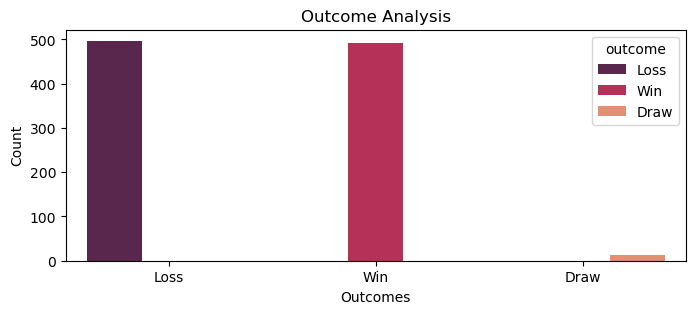

In [10]:
#Win/Loss Rate
plt.figure(figsize=(8,3))
sns.countplot(data=df,x='outcome',hue='outcome',palette='rocket')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.title('Outcome Analysis')
plt.show()

In [11]:
df['win_percentage'] = (df['round_wins'] / (df['round_wins'] + df['round_losses'])) * 10

In [12]:
df['win_percentage']

0      2.777778
1      2.352941
2      7.647059
3      4.090909
4      0.714286
         ...   
995    5.909091
996    4.583333
997    3.157895
998    5.652174
999    3.500000
Name: win_percentage, Length: 1000, dtype: float64

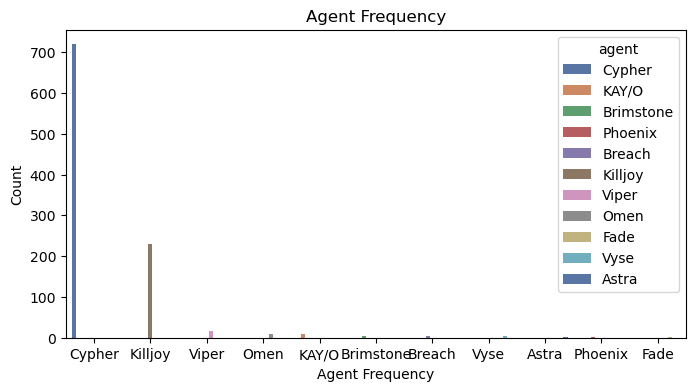

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='agent',hue='agent',order=df['agent'].value_counts().index,palette='deep')
plt.xlabel('Agent Frequency')
plt.ylabel('Count')
plt.title('Agent Frequency')
plt.show()

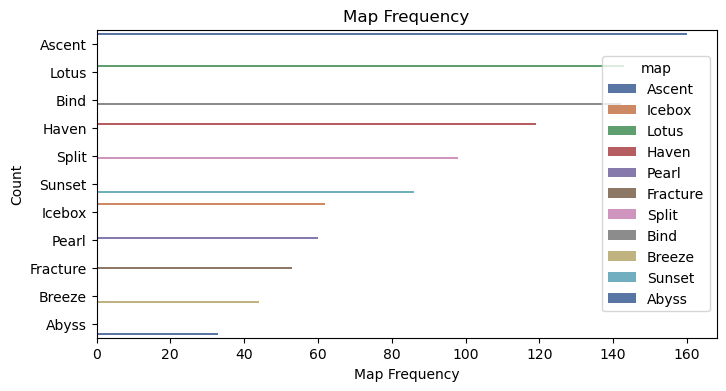

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,y='map',hue='map',order=df['map'].value_counts().index,palette='deep')
plt.xlabel('Map Frequency')
plt.ylabel('Count')
plt.title('Map Frequency')
plt.show()

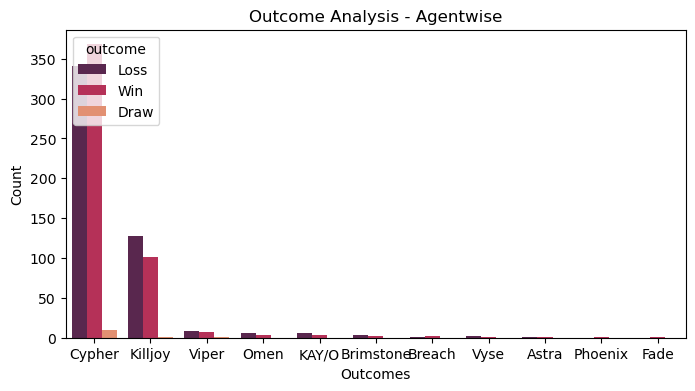

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='agent',hue='outcome',order=df['agent'].value_counts().index,palette='rocket')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.title('Outcome Analysis - Agentwise')
plt.show()

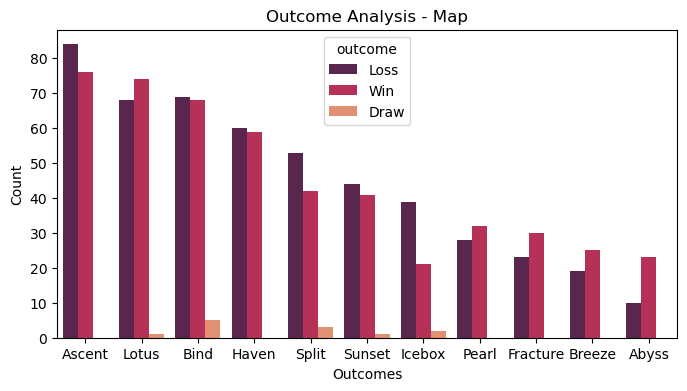

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='map',hue='outcome',order=df['map'].value_counts().index,palette='rocket')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.title('Outcome Analysis - Map')
plt.show()

In [17]:
data1 = df.groupby(['agent'])[['kills','deaths','assists']].sum()
data1 = data1.reset_index()
data1 = data1.sort_values(by='kills', ascending=False)

In [18]:
data1['KDA'] = (data1['kills'] + data1['assists']) / data1['deaths']

In [19]:
data1

,agent,kills,deaths,assists,KDA
3,Cypher,11184,10194,3480,1.438493
6,Killjoy,3411,3275,796,1.284580
9,Viper,241,264,90,1.253788
7,Omen,140,153,98,1.555556
5,KAY/O,119,146,78,1.349315
2,Brimstone,80,74,48,1.729730
10,Vyse,41,45,15,1.244444
0,Astra,29,29,13,1.448276
1,Breach,26,48,26,1.083333
8,Phoenix,16,7,6,3.142857


In [20]:
data2 = df.groupby(['map'])[['kills','deaths','assists']].sum()
data2 = data2.reset_index()
data2 = data2.sort_values(by='kills', ascending=False)

In [21]:
data2['KDA'] = (data2['kills'] + data2['assists']) / data2['deaths']

In [22]:
data2

,map,kills,deaths,assists,KDA
1,Ascent,2322,2278,806,1.373134
7,Lotus,2234,1993,662,1.453086
2,Bind,2218,2055,695,1.417518
5,Haven,1780,1692,471,1.330378
9,Split,1545,1450,477,1.394483
10,Sunset,1332,1228,425,1.430782
8,Pearl,924,880,291,1.380682
6,Icebox,897,894,222,1.251678
4,Fracture,790,763,297,1.424640
3,Breeze,748,594,168,1.542088


In [23]:
df['rank'].unique()

array(['Placement', 'Silver 2', 'Silver 3', 'Gold 1', 'Gold 2', 'Gold 3',
       'Platinum 1', 'Platinum 2', 'Platinum 3', 'Diamond 1', 'Diamond 2',
       'Diamond 3', 'Ascendant 1', 'Ascendant 2'], dtype=object)

In [24]:
df['rank'].value_counts()

Ascendant 1    179
Diamond 3      153
Diamond 1      126
Platinum 3     111
Gold 3          93
Diamond 2       78
Platinum 1      66
Ascendant 2     57
Platinum 2      48
Placement       24
Gold 2          24
Silver 2        17
Gold 1          17
Silver 3         7
Name: rank, dtype: int64

In [25]:
data3 =df.groupby(['rank'])[['kills','deaths','assists']].sum()
data3 =data3.reset_index()
data3 = data3.sort_values(by='kills', ascending=False)

In [26]:
data3['KDA'] = (data3['kills'] + data3['assists']) / data3['deaths']

In [27]:
data3

,rank,kills,deaths,assists,KDA
0,Ascendant 1,2618,2488,770,1.361736
4,Diamond 3,2302,2161,691,1.385007
2,Diamond 1,1941,1751,538,1.415762
11,Platinum 3,1727,1601,497,1.389132
7,Gold 3,1427,1348,476,1.411721
3,Diamond 2,1278,1111,375,1.487849
9,Platinum 1,1036,929,305,1.443488
1,Ascendant 2,847,821,246,1.331303
10,Platinum 2,819,692,275,1.580925
6,Gold 2,381,372,121,1.349462


In [28]:
df['date'] = pd.to_datetime(df['date'])

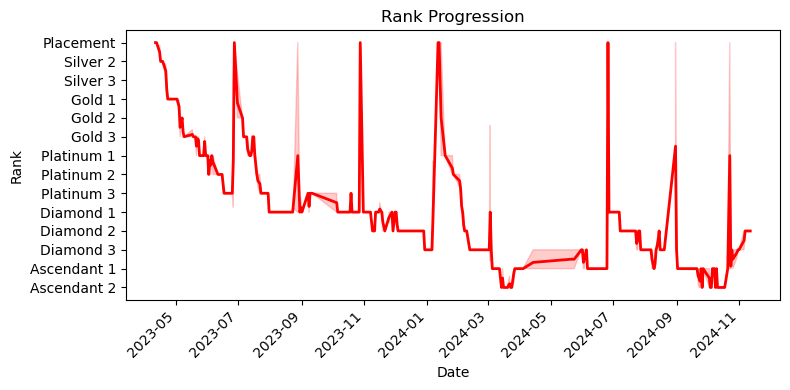

In [29]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='date',y='rank',color='red',linewidth='2')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.title('Rank Progression')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# My Answer

### Overall, his journey must have been very frustrating and long, considering most of his round wins were in the 17& to 22%. He has had a lot of hardship at around Plat to Ascendent 1. His most played agent was Cypher, and his most played map was Ascent. The map he played the best was Abyss, as it has the highest Kill Death Assist Ratio. His best Agent was Pheonix, considering he hasn't played Pheonix much, but the best performance with the biggest amount of data was